In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [59]:
df = pd.read_csv('/home/sesna/sesna/Algoaces/Mall_Customers.csv')
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [60]:
df.drop(['CustomerID','Genre','Age'],axis=1,inplace=True)

In [30]:
df.head(5)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [64]:
df.dtypes

Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

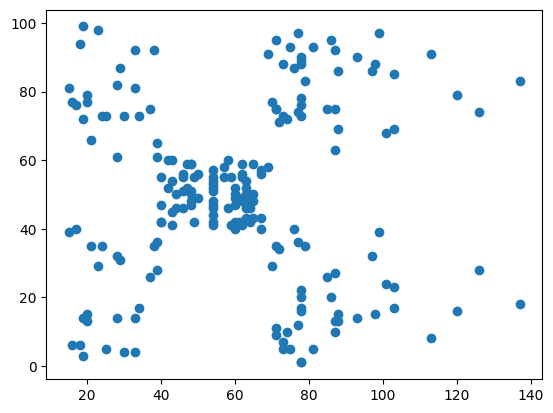

In [65]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])

In [77]:
class Kmeans():
    def __init__(self,n_cluster=2,max_iter=100):
        self.n_cluster =n_cluster
        self.max_iter = max_iter
        self.centroid = None

    def fit_predict(self,X):
        random_index = random.sample(range(0,X.shape[0]),self.n_cluster)
        self.centroids = X.iloc[random_index].values

        for i in range(self.max_iter):
            # assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids.copy()
            # move centroids
            self.centroids = self.move_centroids(X,cluster_group)
            # check finish
            if np.allclose(old_centroids,self.centroids):
                break

        return cluster_group

    def assign_clusters(self,X):
        cluster_group = []
        distances = []

        for row in X.values:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
        new_centroids = []

        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            cluster_data = X[cluster_group == type]
            centroid = cluster_data.mean(axis=0)
            
            new_centroids.append(centroid)

        return np.array(new_centroids)

     

In [78]:
km = Kmeans(n_cluster=3,max_iter=500)
y_means = km.fit_predict(df)

In [79]:
y_means

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [82]:
df['Predicted'] = y_means

In [85]:
df.head(10)

,Annual Income (k$),Spending Score (1-100),Predicted
0,15,39,0
1,15,81,0
2,16,6,0
3,16,77,0
4,17,40,0
5,17,76,0
6,18,6,0
7,18,94,0
8,19,3,0
9,19,72,0


In [86]:
df.tail(10)

,Annual Income (k$),Spending Score (1-100),Predicted
190,103,23,2
191,103,69,1
192,113,8,2
193,113,91,1
194,120,16,2
195,120,79,1
196,126,28,2
197,126,74,1
198,137,18,2
199,137,83,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


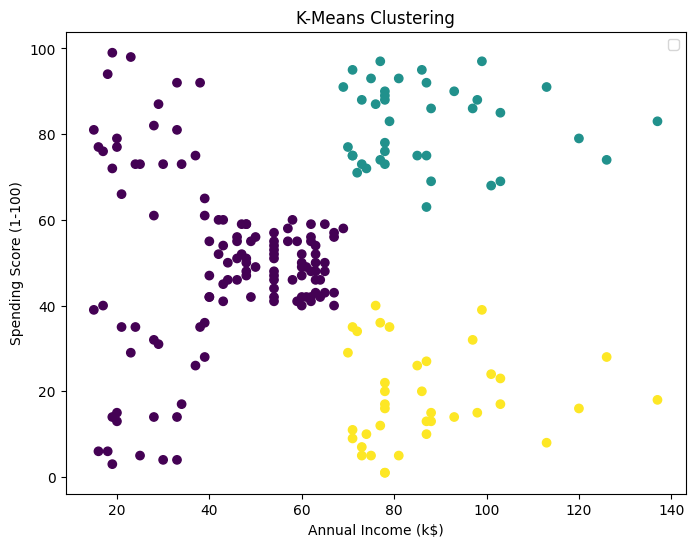

In [94]:

plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Predicted'])

# Set labels and title
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')

# Add legend
plt.legend()

# Show plot
plt.show()